In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate, stats
import matplotlib.cm as cm
from numpy import fft
from scipy.interpolate import interp1d
import importlib

from source import plots
from source import prob_dists as pd

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%pwd

'/Users/runburg/github/dm_gal_substructure'

In [2]:
n = 0
importlib.reload(pd)
importlib.reload(plots)
params = {'R_G': 220, # Kpc
          'd_solar': 8.5, # kpc
          'psi': 40,
          'M_min': 1.0e-2, # Msun
          'M_max': 1.0e10, # Msun
          'fwimp': 1.0,
          'mean_params': {'a':77.4, 'b':0.87+0.31*n, 'c':-0.23-0.04*n},
          'nside': 128,
          'area_fermi': 2000.0, # cm^2
          'n': n,
          'log_flux_min': -15, # log10 photons/cm^2/yr
          'log_flux_max': -5, # log10 photons/cm^2/yr
          'N': 1000,
          'log_k_min': -3,
#           'log_k_min': 2,
          'log_k_max': 6,
#           'log_k_max': 6.5,
          'N_k': 250000,
          'psh_log_f_min': -5,
#           'psh_log_f_min': -4.5,
#           'psh_log_f_max': -4.7,
          'psh_log_f_max': -3.5,
          'N_psh': 500
         }

params['omega_pixel'] = 4.*np.pi/(12*params['nside']**2.) # sr
p = params
import json
json.dump(p, open('source/n0.params', 'w'), indent=0)

In [3]:
q = json.load(open('source/n0.params', 'r'))
q['N']

1000

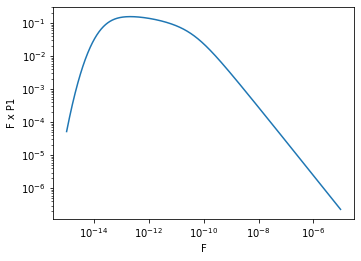

In [4]:
fluxes = np.logspace(p['log_flux_min'], p['log_flux_max'], num=p['N'])
p1_vals = pd.p1(fluxes, **p)
fig, _ = plots.check_fp1_plot(fluxes, p1_vals)

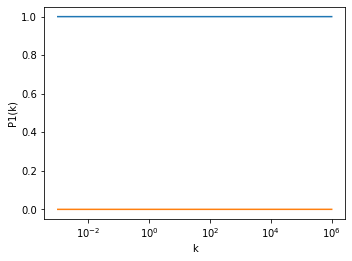

In [5]:
muu = pd.mu(**p)
ft_p1_vals, k = pd.ft_p1(p1_vals, fluxes, **p)
fig, _ = plots.check_ft_p1_plot(k, ft_p1_vals)

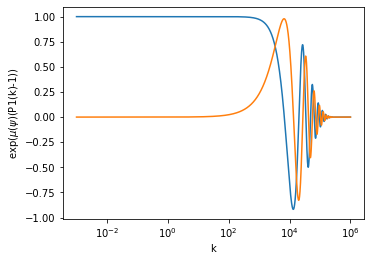

In [6]:
fig, _ = plots.check_psh_integrand_plot(k, ft_p1_vals, muu)

In [7]:
pf_vals, flux = pd.pf(muu, ft_p1_vals, k, **p)

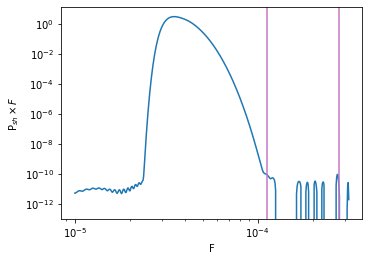

In [8]:
startl = 350
limi = -20
fig, _ = plots.check_psh_plot(flux, pf_vals.real, j=[startl, limi])

# print(pf_vals)

In [9]:
print(f'\mu \int F P1: {(muu[0] * integrate.simps(fluxes * p1_vals, fluxes))}')
print(f' \int F Psh: {integrate.simps(pf_vals[startl:limi].real * flux[startl:limi], flux[startl:limi])}')


\mu \int F P1: 3.728990876665818e-05
 \int F Psh: -1.8299905206268193e-15


In [10]:
np.trapz(pf_vals[startl:limi].real, flux[startl:limi])

-9.368900679144102e-12

In [11]:
pshvals, fxs = pd.psh(params, plot=False, infer_values=True)

Got P1(F) values
inferred log_k_max 8.500000000000018
Finished FT of P1
Finished Psh computation
\mu \int F P1: 3.7292890850282595e-05
 \int F Psh: 3.7293187590240464e-05
percent error = 0.0%



 \int F Psh: 3.729288951442081e-05


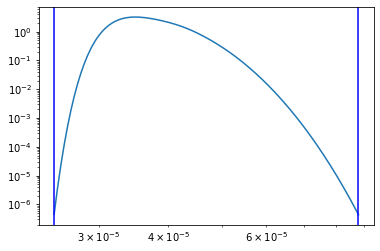

In [12]:
plt.plot(fxs, fxs * pshvals.real)
ax = plt.gca()
startl = 0
limi = -1
ax.set_xscale('log')
ax.set_yscale('log')
ax.axvline(fxs[startl], color='b')
ax.axvline(fxs[limi], color='b')

print(f' \int F Psh: {integrate.simps(pshvals[startl:limi].real * fxs[startl:limi], fxs[startl:limi])}')



In [13]:
pshop, fluxes, psis = pd.psh_of_psi(p, num_psi=10, infer_values=True)

Angle: 40.0
Got P1(F) values
inferred log_k_max 8.500000000000018


KeyboardInterrupt: 

In [ ]:
plots.psh_func_psi_plot(pshop, fluxes, psis, outfile='./output/n0_psh_of_psi.png')

In [ ]:
importlib.reload(pd)
psh_2dfunc = pd.interp_and_save_psh(p, pshop, fluxes, psis, outfile='./output/n0_pshfunc.npz')

In [ ]:
numnum = 100
psis = np.linspace(40, 90, num=numnum)
colors = cm.viridis(np.linspace(0, 1, num=numnum))

fig, ax = plt.subplots()

psh_vals_over_psi = []
fxs = flux
for psi, col in zip(psis, colors):
    ax.plot(fxs, fxs * psh_2dfunc(psi, fxs).flatten(), label=rf"{psi}$^\circ$", color=col, lw=0.5)
   
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('F')
ax.set_ylabel('F x Psh')
cbarlabs = np.arange(min(psis), max(psis)+1, step=10)
cbar = fig.colorbar(cm.ScalarMappable(cmap=cm.viridis), ticks=np.linspace(0, 1, num=len(cbarlabs)))
cbar.set_label(r'$\psi$[$^\circ$]', rotation=270)
cbar.ax.set_yticklabels(cbarlabs)

In [ ]:
def pc()